In [1]:
#Importing Very Basic Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df_diamond = pd.read_csv("diamonds.csv")

In [3]:
df_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df_diamond.drop(["Unnamed: 0"], axis=1, inplace=True)

In [15]:
df_diamond["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
df_diamond["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [17]:
#I can go with One Hot Encoding for this two field .. But let me check for null values
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [18]:
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Nice no null data.. Green Signal

In [19]:
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


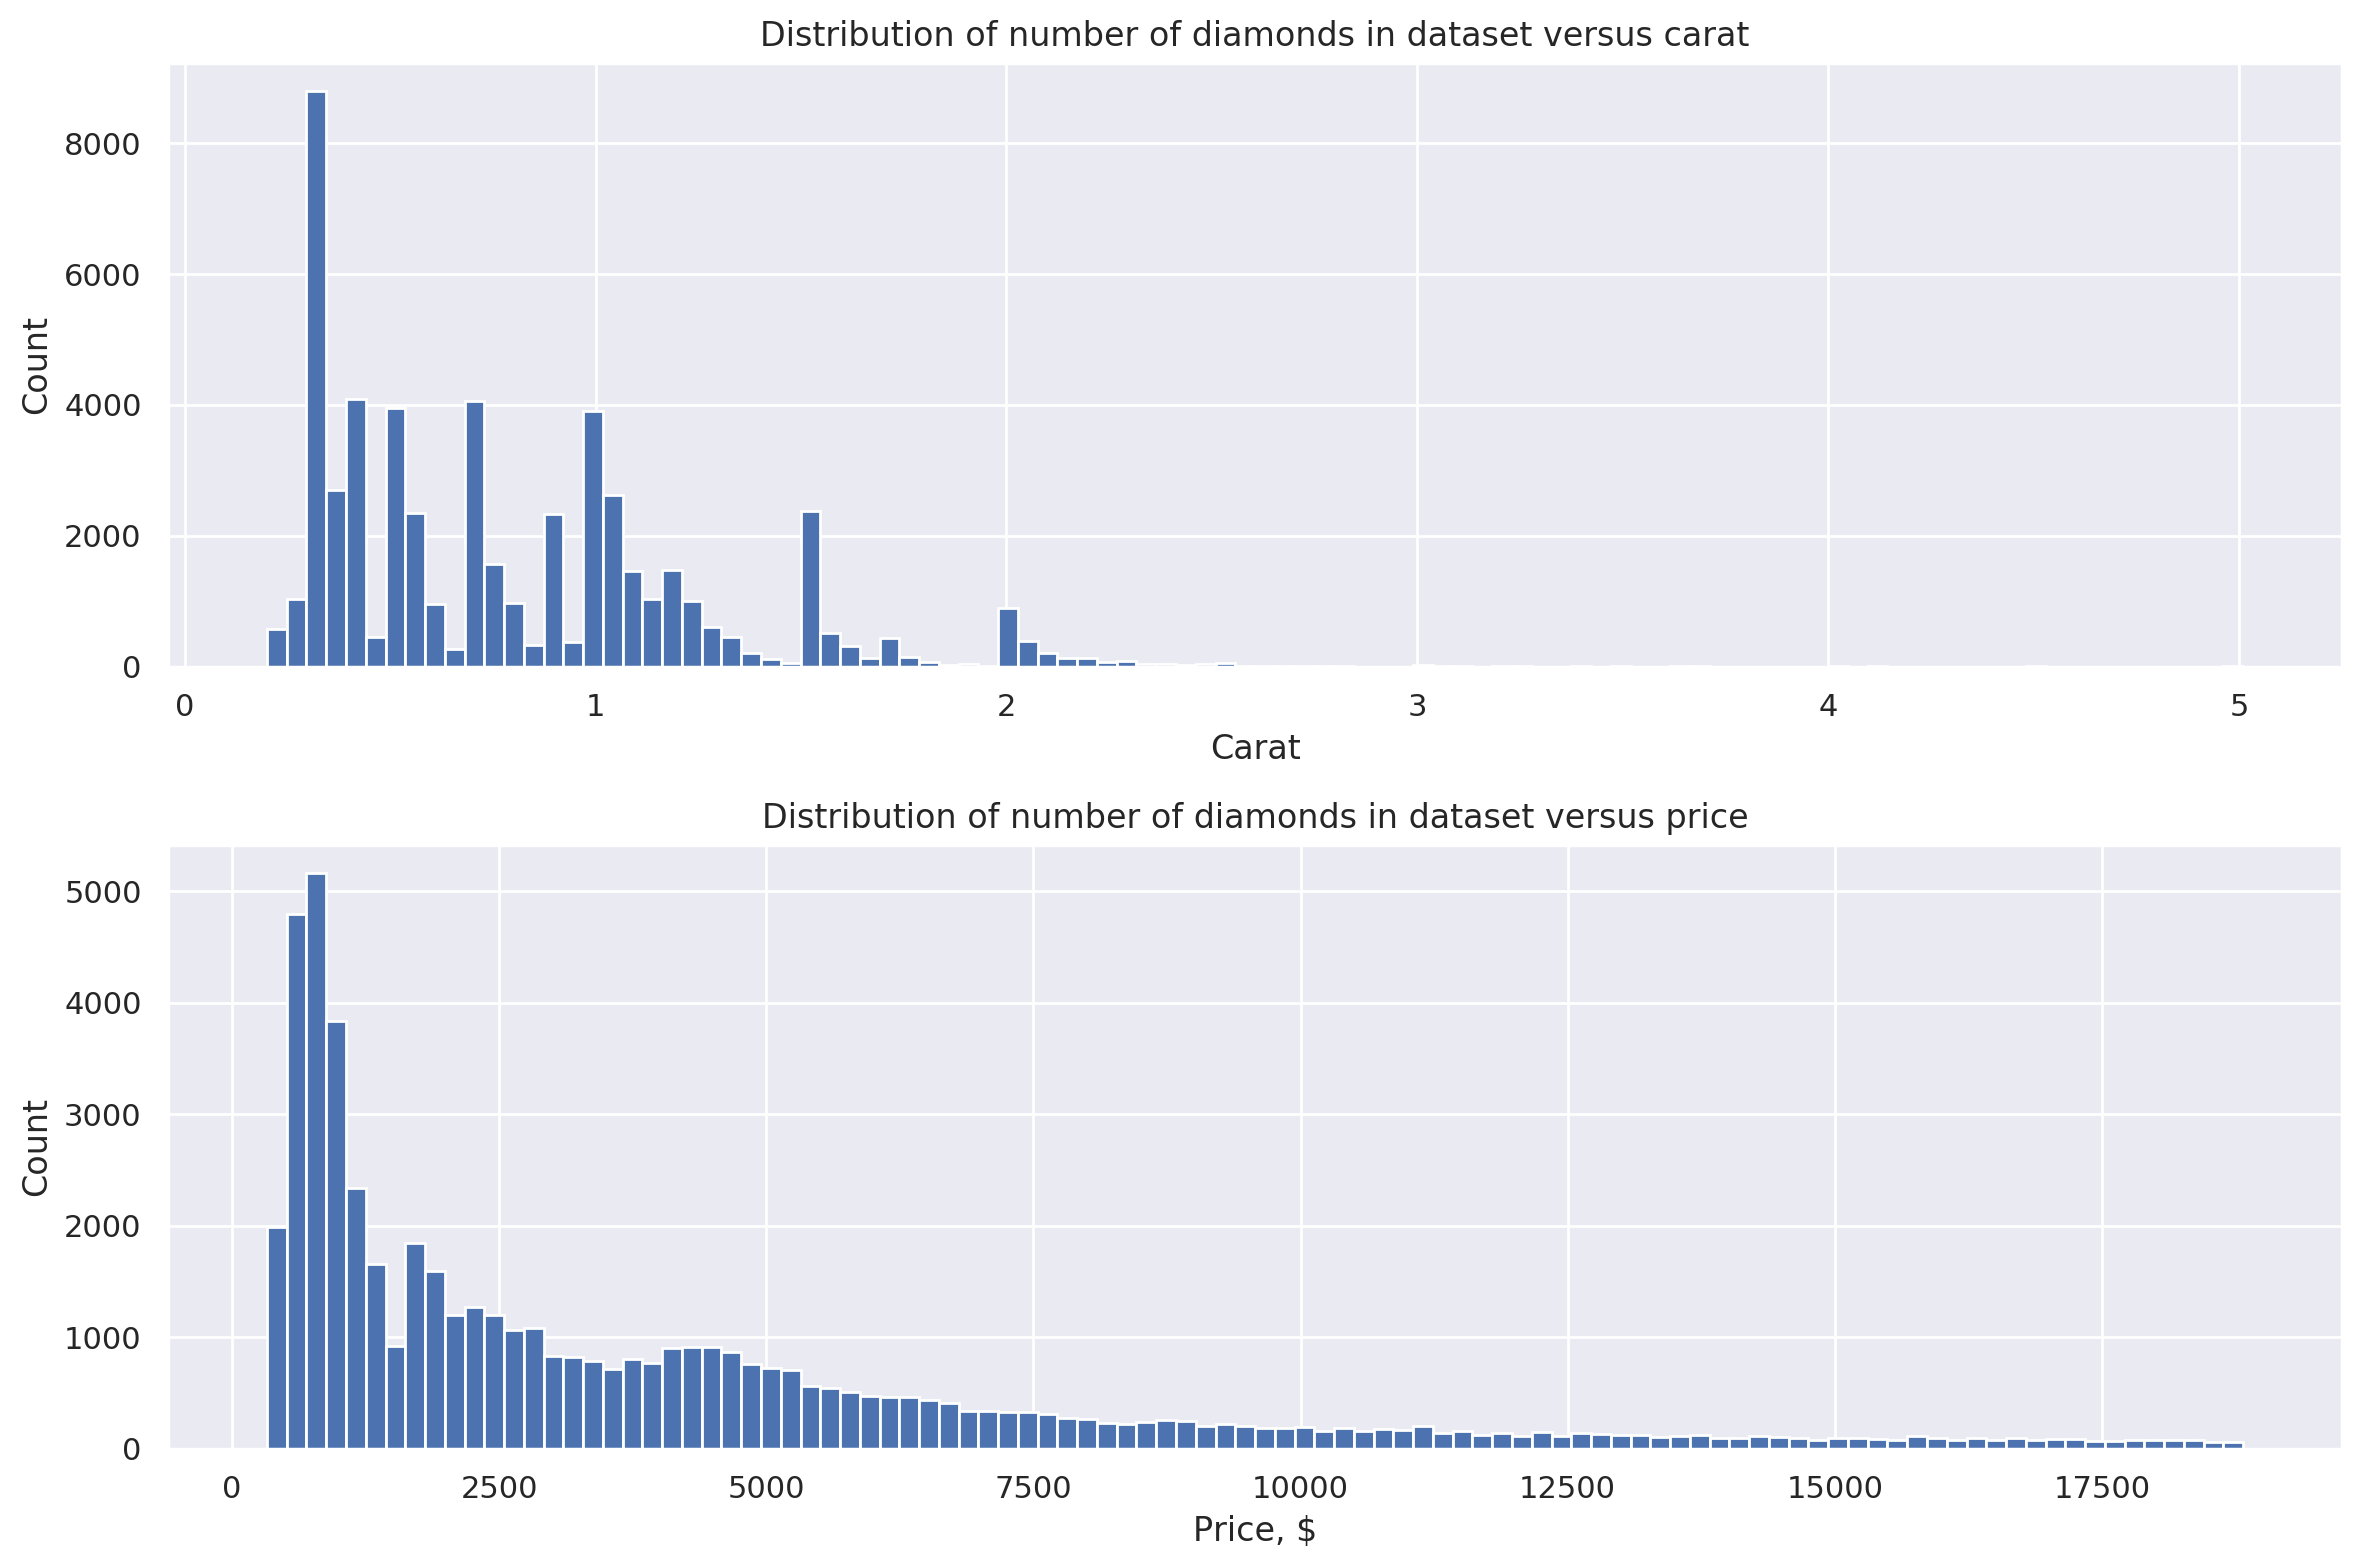

In [21]:
# Explore the distribution of diamonds in the dataset
sns.set()
plt.figure(figsize = (12,8), dpi=200)
plt.subplot(2,1,1)
_ = plt.hist(df_diamond['carat'], bins = 100)
_ = plt.xlabel('Carat')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of number of diamonds in dataset versus carat')
plt.subplot(2,1,2)
_ = plt.hist(df_diamond['price'], bins = 100)
_ = plt.xlabel('Price, $')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of number of diamonds in dataset versus price')
plt.tight_layout()
plt.savefig('Price and carat distribution')
plt.show()

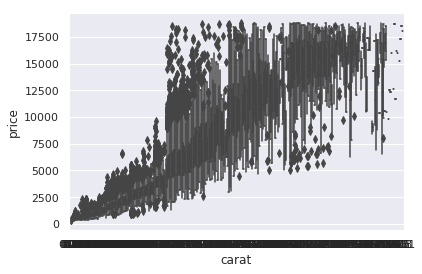

In [24]:
ax = sns.boxplot(x="carat", y="price", data=df_diamond)

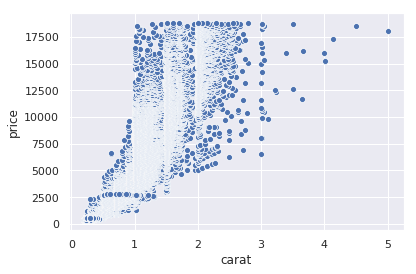

In [25]:
ax_scatter = sns.scatterplot(x="carat", y="price", data=df_diamond)

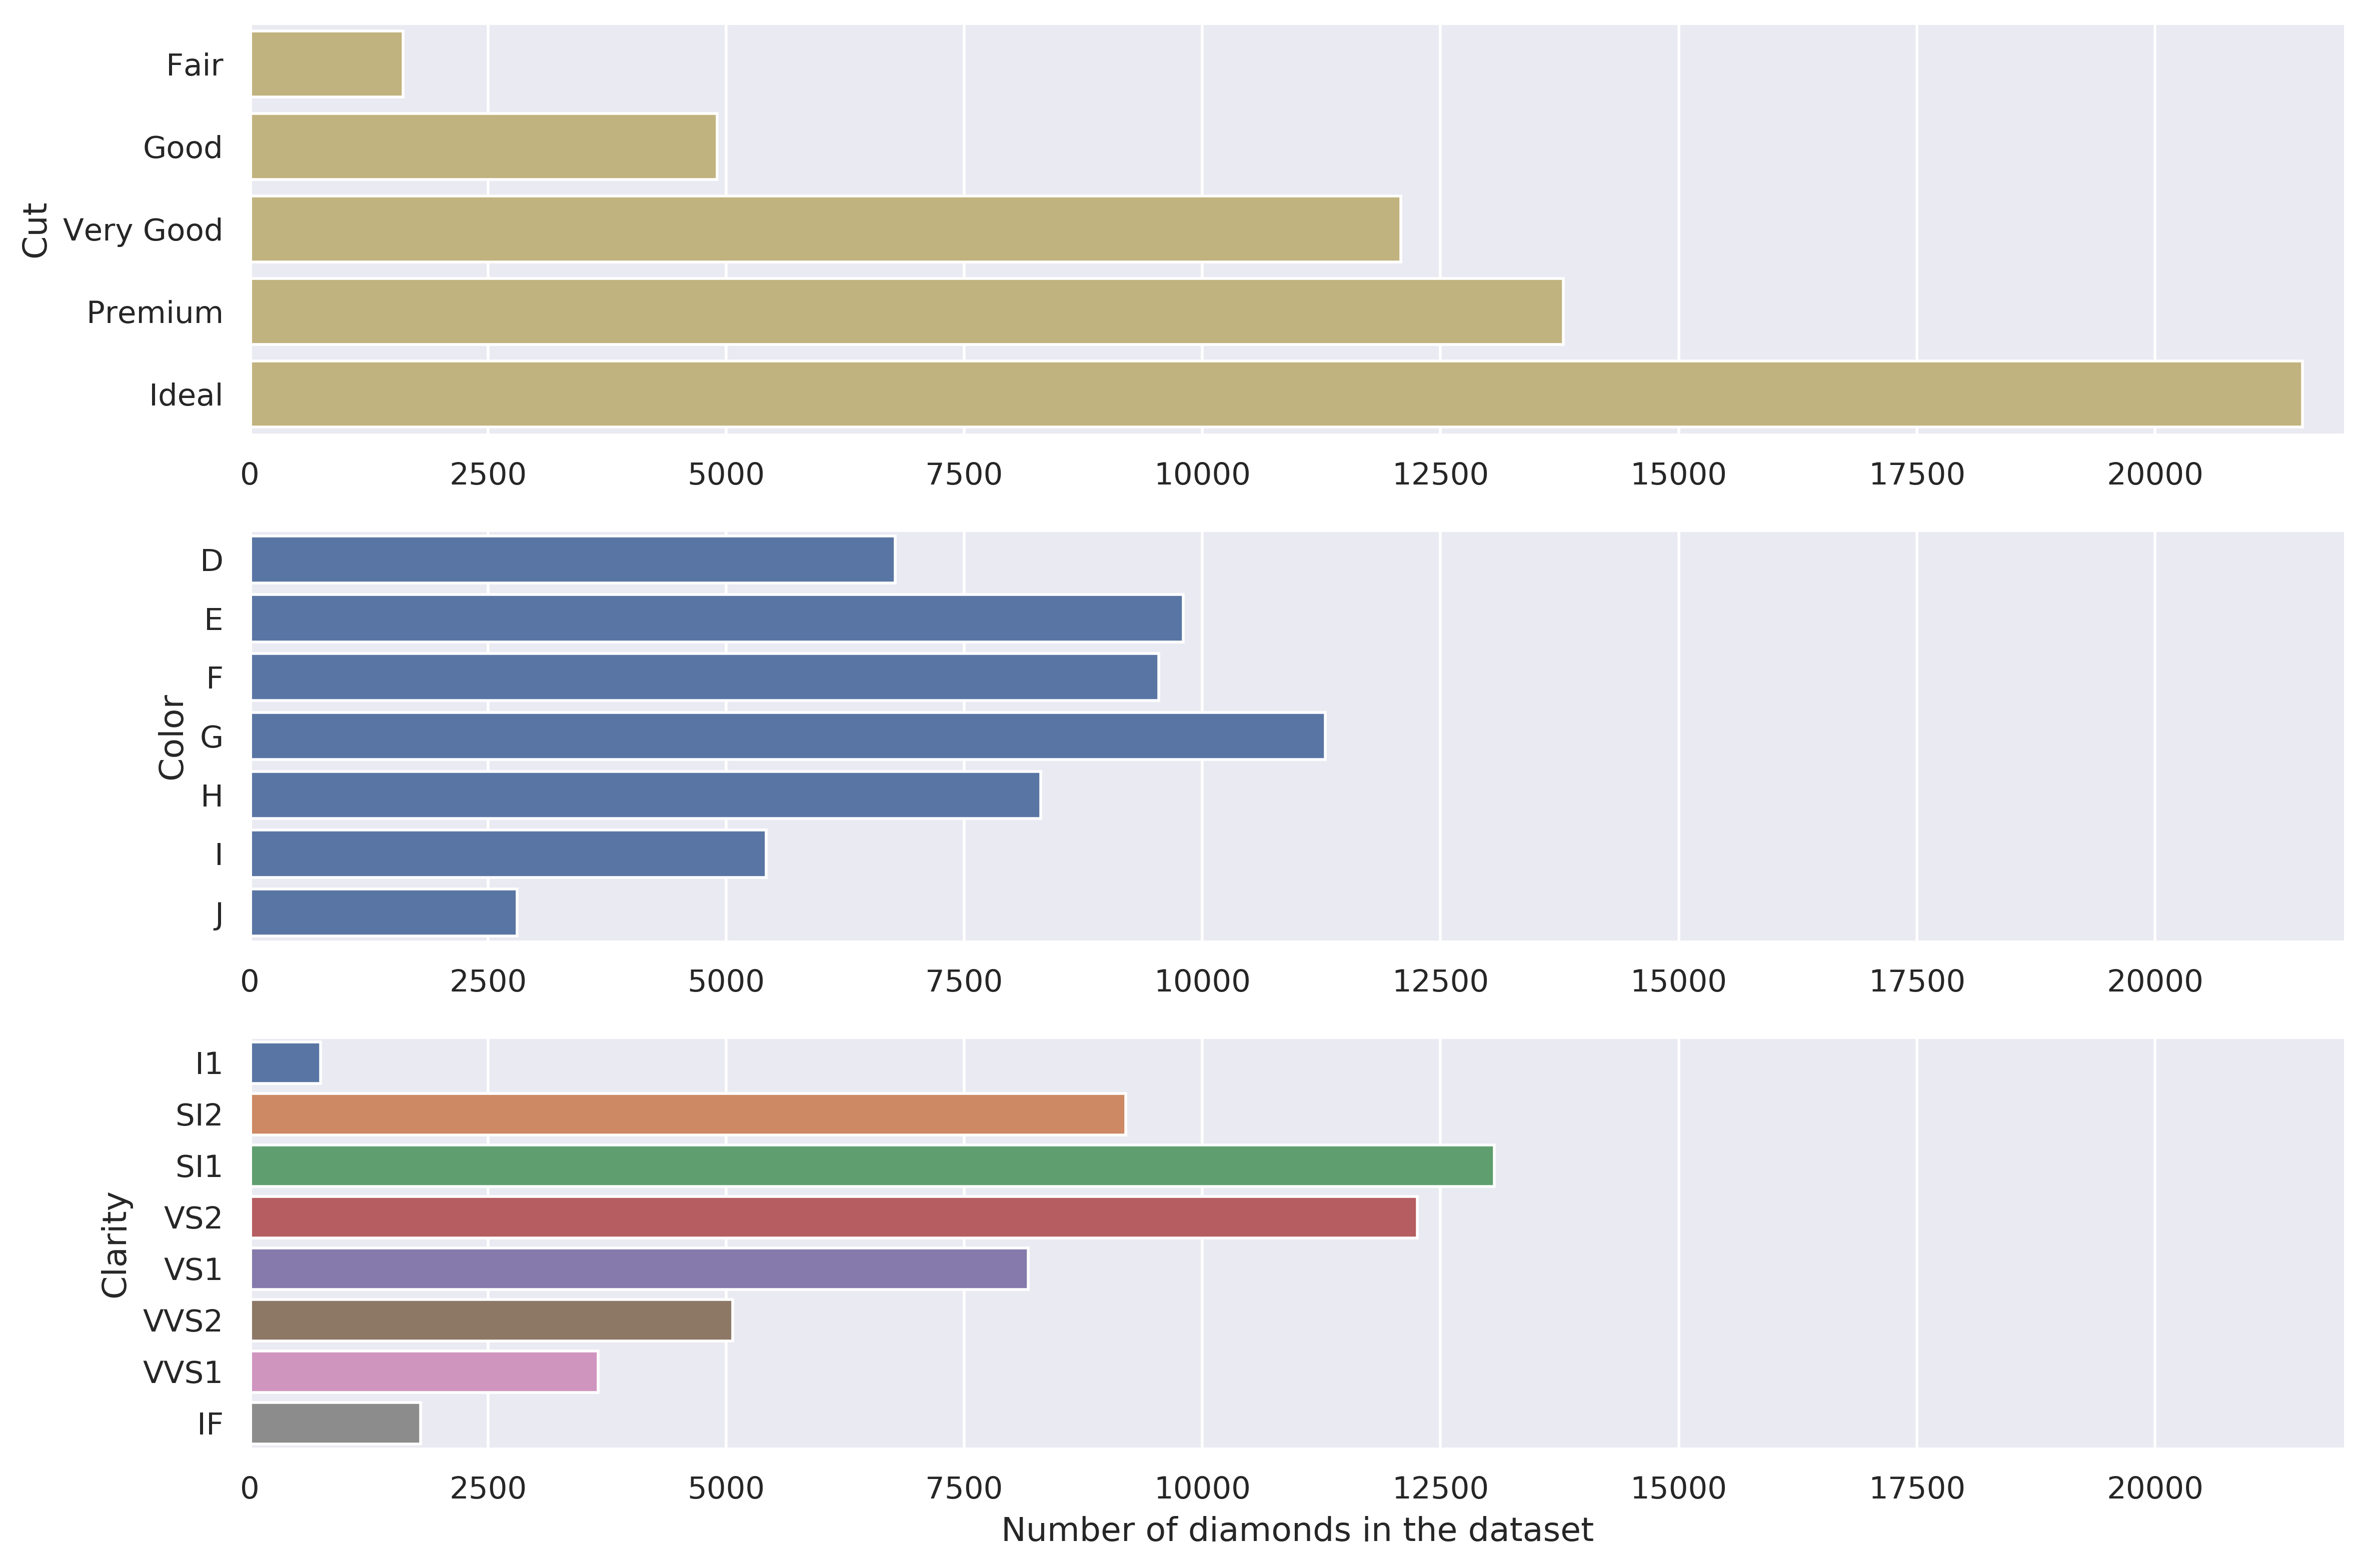

In [28]:
df_diamond.cut = pd.Categorical(values=df_diamond.cut, categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df_diamond.color = pd.Categorical(values = df_diamond.color, categories=['D', 'E', 'F', 'G', 'H','I','J'], ordered=True)
df_diamond.clarity = pd.Categorical(values = df_diamond.clarity, categories=['I1', 'SI2', 'SI1','VS2','VS1','VVS2','VVS1','IF'], ordered=True)

plt.figure(figsize = (12,8), dpi=400)
plt.subplot(3,1,1)
sns.countplot(y='cut', data=df_diamond, color="y")
plt.xlim((0,22000))
plt.xlabel('')
plt.ylabel('Cut')

plt.subplot(3,1,2)
sns.countplot(y='color', data=df_diamond, color="b")
plt.ylabel('Color')
plt.xlim((0,22000))
plt.xlabel('')

plt.subplot(3,1,3)
sns.countplot(y='clarity', data=df_diamond)
plt.xlabel('Number of diamonds in the dataset')
plt.ylabel('Clarity')
plt.xlim((0,22000))

plt.tight_layout()
plt.show()

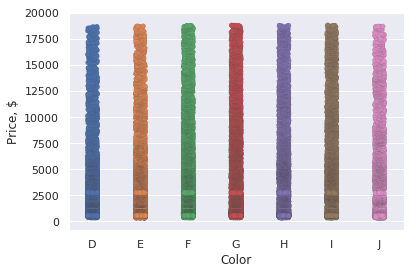

In [34]:
# Color Vs Price

sns.stripplot(x="color", y="price", data=df_diamond, jitter=True, linewidth=0.1) #hue="day"

plt.xlabel('Color')
plt.ylabel('Price, $')
plt.show()

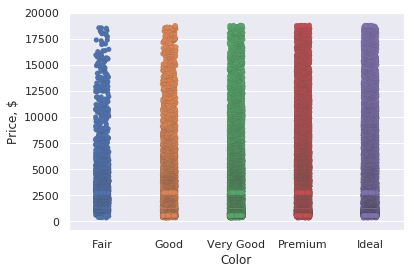

In [38]:
# Cut Vs Price

sns.stripplot(x="cut", y="price", data=df_diamond, jitter=True, linewidth=0.1) #hue="day"

plt.xlabel('Color')
plt.ylabel('Price, $')
plt.show()

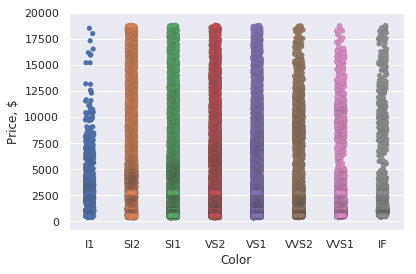

In [39]:
# Clarity Vs Price

sns.stripplot(x="clarity", y="price", data=df_diamond, jitter=True, linewidth=0.1) #hue="day"

plt.xlabel('Color')
plt.ylabel('Price, $')
plt.show()

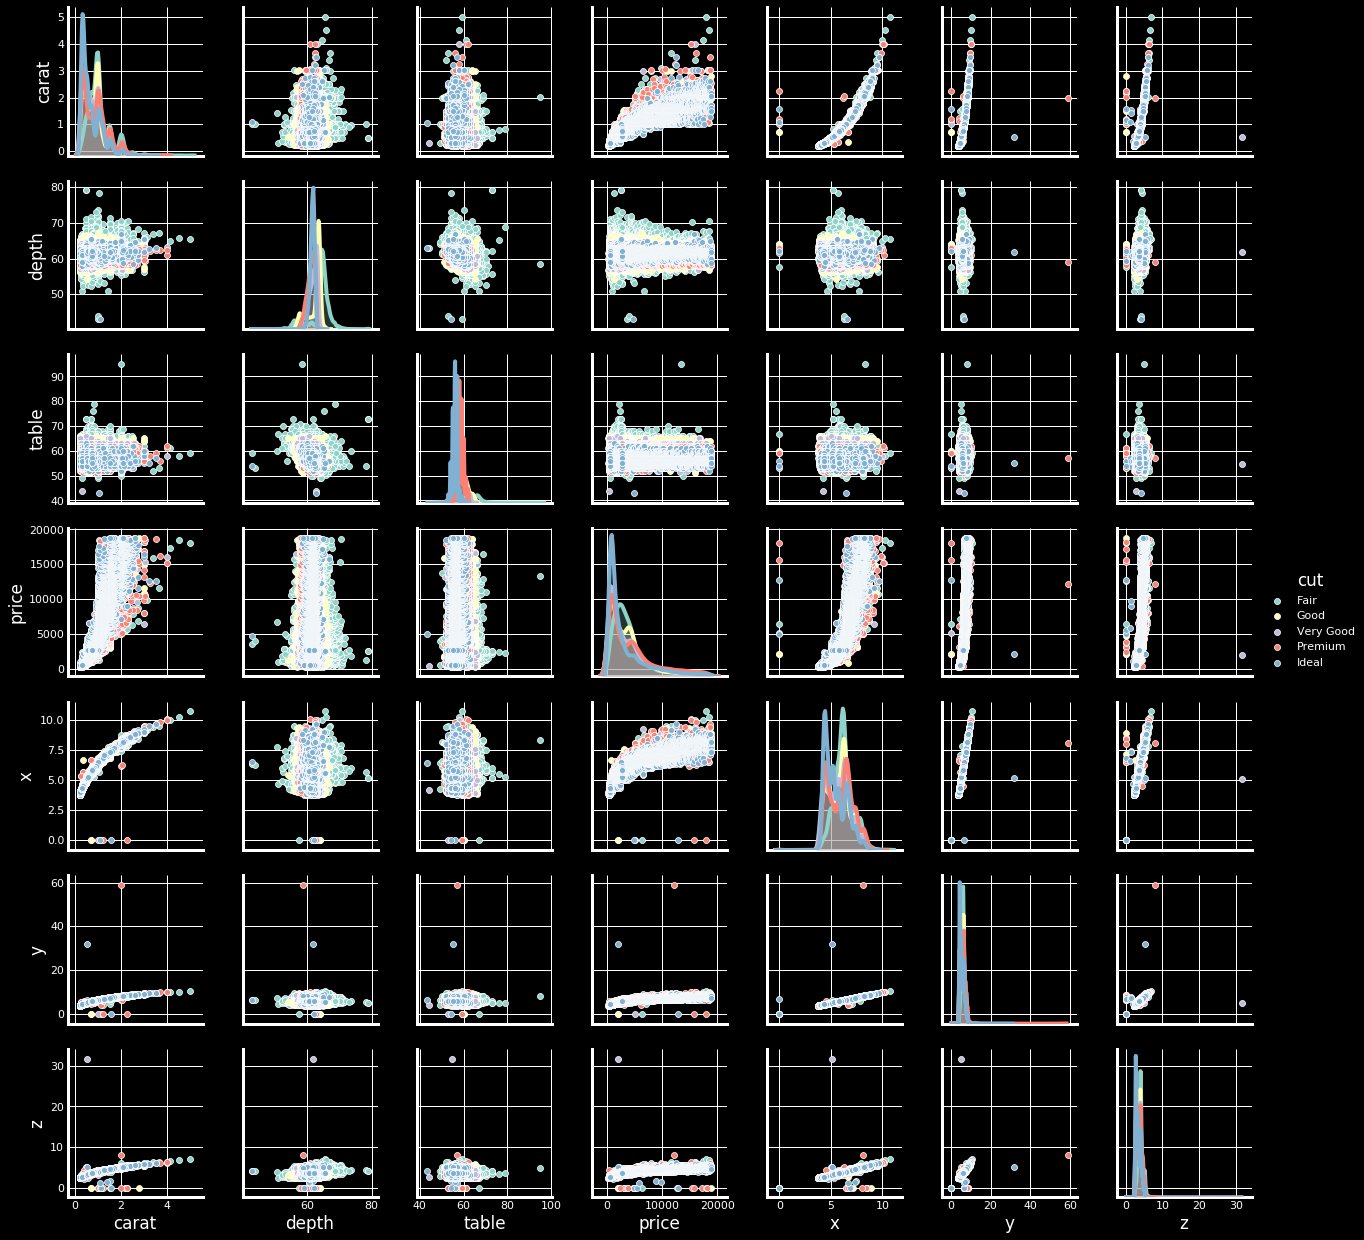

In [46]:
plt.style.use(['fivethirtyeight', 'dark_background'])
# plt.style.use('fivethirtyeight')
sns.pairplot(df_diamond, hue='cut')
plt.show()

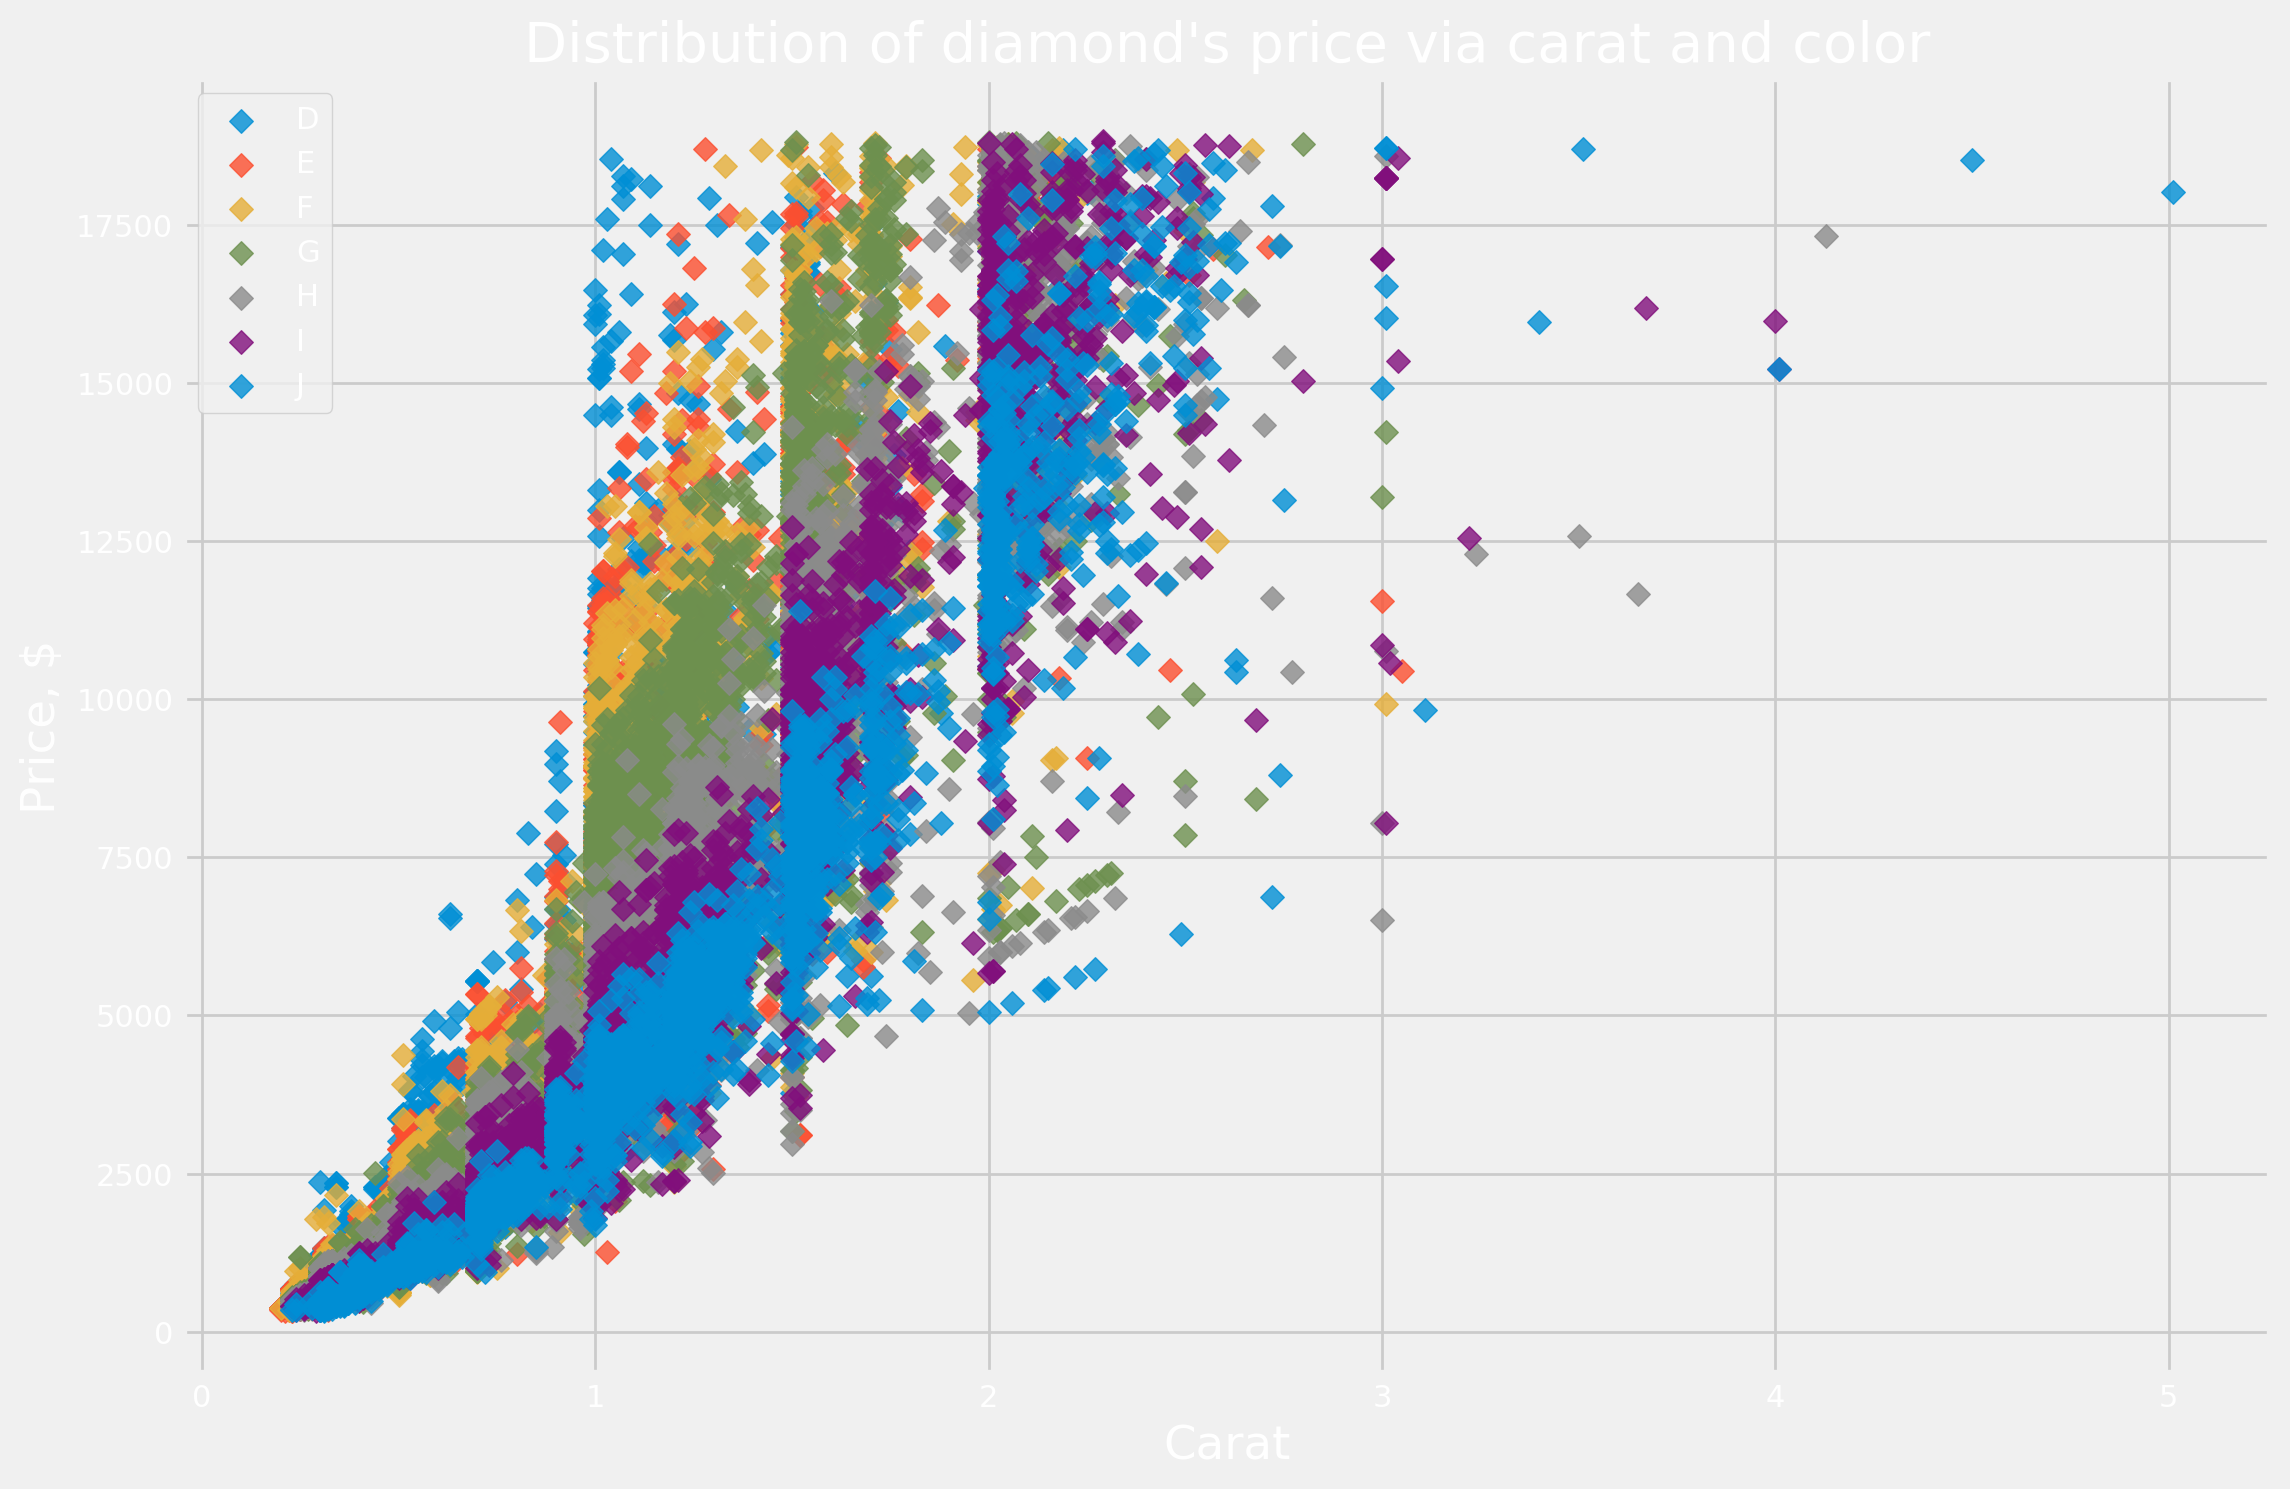

In [48]:
color_range = ['D', 'E', 'F', 'G', 'H','I','J']
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8), dpi=200)
for col in color_range:   
    plt.scatter(df_diamond[df_diamond['color']== col].carat, df_diamond[df_diamond['color']== col].price, alpha=0.8, marker = 'D', label=col)   
plt.xlabel('Carat')
plt.ylabel('Price, $')
plt.legend()
plt.title('''Distribution of diamond's price via carat and color''')
plt.savefig('''Distribution of diamond's price via carat and color''')
plt.show()